In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("output/output-multiprocessing-pool-10000_workers-7_sleep-0_25.csv", parse_dates=["start", "end"], infer_datetime_format=True)

In [3]:
df.head()

,index,start,end,worker,value
0,0,2021-07-18 20:17:16.472490,2021-07-18 20:17:16.535792,SpawnPoolWorker-46,4
1,1,2021-07-18 20:17:16.535819,2021-07-18 20:17:16.572633,SpawnPoolWorker-46,7
2,2,2021-07-18 20:17:16.572659,2021-07-18 20:17:16.626602,SpawnPoolWorker-46,5
3,3,2021-07-18 20:17:16.626630,2021-07-18 20:17:16.654149,SpawnPoolWorker-46,10
4,4,2021-07-18 20:17:16.654198,2021-07-18 20:17:16.704517,SpawnPoolWorker-46,5


In [4]:
sampling_period = "15s"

In [5]:
start_df = df[["start", "worker"]]
start_df.columns = ["time", "worker"]
start_df = start_df.set_index("time")[["worker"]]
start_df = start_df.groupby("worker").resample(sampling_period).count()
start_df.columns = ["started"]
start_df

started
worker             time                        
SpawnPoolWorker-43 2021-07-18 20:17:15      172
                   2021-07-18 20:17:30      214
                   2021-07-18 20:17:45      208
                   2021-07-18 20:18:00      177
                   2021-07-18 20:18:15      185
                   2021-07-18 20:18:30      200
                   2021-07-18 20:18:45      190
                   2021-07-18 20:19:00       62
SpawnPoolWorker-44 2021-07-18 20:17:15      173
                   2021-07-18 20:17:30      207
                   2021-07-18 20:17:45      187
                   2021-07-18 20:18:00      196
                   2021-07-18 20:18:15      208
                   2021-07-18 20:18:30      209
                   2021-07-18 20:18:45      193
                   2021-07-18 20:19:00       59
SpawnPoolWorker-45 2021-07-18 20:17:15      200
                   2021-07-18 20:17:30      209
                   2021-07-18 20:17:45      200
                   2021-07-18 20:18:00      199
                   2021-07-18 20:18:15      201
                   2021-07-18 20:18:30      210
                   2021-07-18 20:18:45      180
                   2021-07-18 20:19:00       33
SpawnPoolWorker-46 2021-07-18 20:17:15      181
                   2021-07-18 20:17:30      200
                   2021-07-18 20:17:45      224
                   2021-07-18 20:18:00      223
                   2021-07-18 20:18:15      194
                   2021-07-18 20:18:30      224
                   2021-07-18 20:18:45      186
SpawnPoolWorker-47 2021-07-18 20:17:15      191
                   2021-07-18 20:17:30      204
                   2021-07-18 20:17:45      201
                   2021-07-18 20:18:00      191
                   2021-07-18 20:18:15      213
                   2021-07-18 20:18:30      199
                   2021-07-18 20:18:45      205
                   2021-07-18 20:19:00       28
SpawnPoolWorker-48 2021-07-18 20:17:15      188
                   2021-07-18 20:17:30      202
                   2021-07-18 20:17:45      218
                   2021-07-18 20:18:00      188
                   2021-07-18 20:18:15      206
                   2021-07-18 20:18:30      191
                   2021-07-18 20:18:45      218
                   2021-07-18 20:19:00       21
SpawnPoolWorker-49 2021-07-18 20:17:15      179
                   2021-07-18 20:17:30      178
                   2021-07-18 20:17:45      206
                   2021-07-18 20:18:00      205
                   2021-07-18 20:18:15      208
                   2021-07-18 20:18:30      205
                   2021-07-18 20:18:45      191
                   2021-07-18 20:19:00       60

In [6]:
end_df = df[["end", "worker"]]
end_df.columns = ["time", "worker"]
end_df = end_df.set_index("time")
end_df = end_df.groupby("worker").resample(sampling_period).count()
end_df.columns = ["ended"]
end_df

ended
worker             time                      
SpawnPoolWorker-43 2021-07-18 20:17:15    171
                   2021-07-18 20:17:30    214
                   2021-07-18 20:17:45    208
                   2021-07-18 20:18:00    177
                   2021-07-18 20:18:15    185
                   2021-07-18 20:18:30    200
                   2021-07-18 20:18:45    190
                   2021-07-18 20:19:00     63
SpawnPoolWorker-44 2021-07-18 20:17:15    172
                   2021-07-18 20:17:30    207
                   2021-07-18 20:17:45    187
                   2021-07-18 20:18:00    196
                   2021-07-18 20:18:15    208
                   2021-07-18 20:18:30    209
                   2021-07-18 20:18:45    193
                   2021-07-18 20:19:00     60
SpawnPoolWorker-45 2021-07-18 20:17:15    199
                   2021-07-18 20:17:30    209
                   2021-07-18 20:17:45    200
                   2021-07-18 20:18:00    199
                   2021-07-18 20:18:15    201
                   2021-07-18 20:18:30    210
                   2021-07-18 20:18:45    180
                   2021-07-18 20:19:00     34
SpawnPoolWorker-46 2021-07-18 20:17:15    180
                   2021-07-18 20:17:30    200
                   2021-07-18 20:17:45    224
                   2021-07-18 20:18:00    223
                   2021-07-18 20:18:15    194
                   2021-07-18 20:18:30    224
                   2021-07-18 20:18:45    187
SpawnPoolWorker-47 2021-07-18 20:17:15    190
                   2021-07-18 20:17:30    204
                   2021-07-18 20:17:45    201
                   2021-07-18 20:18:00    191
                   2021-07-18 20:18:15    213
                   2021-07-18 20:18:30    199
                   2021-07-18 20:18:45    205
                   2021-07-18 20:19:00     29
SpawnPoolWorker-48 2021-07-18 20:17:15    187
                   2021-07-18 20:17:30    202
                   2021-07-18 20:17:45    218
                   2021-07-18 20:18:00    188
                   2021-07-18 20:18:15    206
                   2021-07-18 20:18:30    191
                   2021-07-18 20:18:45    218
                   2021-07-18 20:19:00     22
SpawnPoolWorker-49 2021-07-18 20:17:15    178
                   2021-07-18 20:17:30    178
                   2021-07-18 20:17:45    206
                   2021-07-18 20:18:00    205
                   2021-07-18 20:18:15    208
                   2021-07-18 20:18:30    205
                   2021-07-18 20:18:45    191
                   2021-07-18 20:19:00     61

In [7]:
occurances_df = start_df.join(end_df)
occurances_df["difference"] = occurances_df["started"] - occurances_df["ended"]
occurances_df.head()

started  ended  difference
worker             time                                           
SpawnPoolWorker-43 2021-07-18 20:17:15      172    171           1
                   2021-07-18 20:17:30      214    214           0
                   2021-07-18 20:17:45      208    208           0
                   2021-07-18 20:18:00      177    177           0
                   2021-07-18 20:18:15      185    185           0

In [8]:
sum_occurances_df = occurances_df.reset_index()
sum_occurances_df = sum_occurances_df.groupby("time")[["started", "ended", "difference"]].sum()
sum_occurances_df

,started,ended,difference
time,,,
2021-07-18 20:17:15,1284,1277,7
2021-07-18 20:17:30,1414,1414,0
2021-07-18 20:17:45,1444,1444,0
2021-07-18 20:18:00,1379,1379,0
2021-07-18 20:18:15,1415,1415,0
2021-07-18 20:18:30,1438,1438,0
2021-07-18 20:18:45,1363,1364,-1
2021-07-18 20:19:00,263,269,-6


In [9]:
sum_occurances_df = sum_occurances_df.reset_index()
min_time = sum_occurances_df["time"].min()
sum_occurances_df["time"] = sum_occurances_df["time"].apply(lambda x: int((x - min_time).total_seconds()))
sum_occurances_df = sum_occurances_df.set_index("time")
sum_occurances_df.head()

,started,ended,difference
time,,,
0,1284,1277,7
15,1414,1414,0
30,1444,1444,0
45,1379,1379,0
60,1415,1415,0


<AxesSubplot:xlabel='time'>

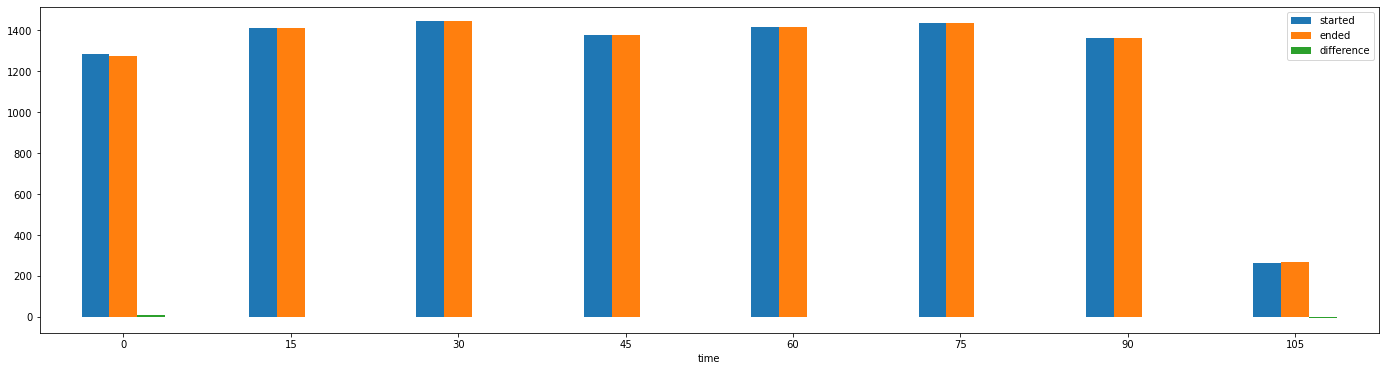

In [10]:
fig, ax = plt.subplots(figsize=(24, 6))
sum_occurances_df.plot(kind="bar", ax=ax, rot=0)

In [11]:
df.reset_index()

,level_0,index,start,end,worker,value
0,0,0,2021-07-18 20:17:16.472490,2021-07-18 20:17:16.535792,SpawnPoolWorker-46,4
1,1,1,2021-07-18 20:17:16.535819,2021-07-18 20:17:16.572633,SpawnPoolWorker-46,7
2,2,2,2021-07-18 20:17:16.572659,2021-07-18 20:17:16.626602,SpawnPoolWorker-46,5
3,3,3,2021-07-18 20:17:16.626630,2021-07-18 20:17:16.654149,SpawnPoolWorker-46,10
4,4,4,2021-07-18 20:17:16.654198,2021-07-18 20:17:16.704517,SpawnPoolWorker-46,5
...,...,...,...,...,...,...
9995,9995,9995,2021-07-18 20:19:03.904935,2021-07-18 20:19:04.160106,SpawnPoolWorker-43,1
9996,9996,9996,2021-07-18 20:19:04.160139,2021-07-18 20:19:04.214158,SpawnPoolWorker-43,5
9997,9997,9997,2021-07-18 20:19:04.214186,2021-07-18 20:19:04.264759,SpawnPoolWorker-43,5
9998,9998,9998,2021-07-18 20:19:04.264782,2021-07-18 20:19:04.328821,SpawnPoolWorker-43,4


In [12]:
worker_occurances_df = df.reset_index()
worker_occurances_df = worker_occurances_df.groupby(["start", "worker"])[["value"]].sum()
worker_occurances_df.columns = ["occurances"]
worker_occurances_df

,,occurances
start,worker,
2021-07-18 20:17:16.472490,SpawnPoolWorker-46,4
2021-07-18 20:17:16.477936,SpawnPoolWorker-44,10
2021-07-18 20:17:16.479751,SpawnPoolWorker-43,3
2021-07-18 20:17:16.479956,SpawnPoolWorker-45,4
2021-07-18 20:17:16.480724,SpawnPoolWorker-47,8
...,...,...
2021-07-18 20:19:04.638006,SpawnPoolWorker-49,1
2021-07-18 20:19:04.888950,SpawnPoolWorker-49,6
2021-07-18 20:19:04.930876,SpawnPoolWorker-49,5


In [13]:
worker_occurances_df = worker_occurances_df.reset_index()
worker_occurances_df["start"] = worker_occurances_df["start"].apply(lambda x: int((x - min_time).total_seconds()))
worker_occurances_df.head()

,start,worker,occurances
0,1,SpawnPoolWorker-46,4
1,1,SpawnPoolWorker-44,10
2,1,SpawnPoolWorker-43,3
3,1,SpawnPoolWorker-45,4
4,1,SpawnPoolWorker-47,8
